# Training Machine learning Model to predict Airline Customer Satisfaction
**Student Name:** Divyangkumar Patel


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1. Load data

airline = pd.read_csv('/content/drive/MyDrive/airline/airline.csv')
print(f'Number of records in the airline is {airline.shape[0]}, each having {airline.shape[1]} features!')

airline.head()

Number of records in the airline is 103904, each having 25 features!


,SR,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# 2. Metadata information

airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SR                                 103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online_booking             103904 non-null  int64  
 11  Gate_location                      1039

In [ ]:
# 3. Check if there are duplicates

# Count duplicates
num_duplicates = airline.duplicated().sum()

print("Number of duplicates in the DataFrame:", num_duplicates)

Number of duplicates in the DataFrame: 0


Clean data

In [ ]:
# 4. EDA

# 1. Descriptive statistics
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
SR,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight_Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease_of_Online_booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate_location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food_and_drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online_boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [ ]:
# 2. Categorical columns statistics
airline.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
Customer_Type,103904,2,Loyal Customer,84923
Type_of_Travel,103904,2,Business travel,71655
Class,103904,3,Business,49665
satisfaction,103904,2,neutral or dissatisfied,58879


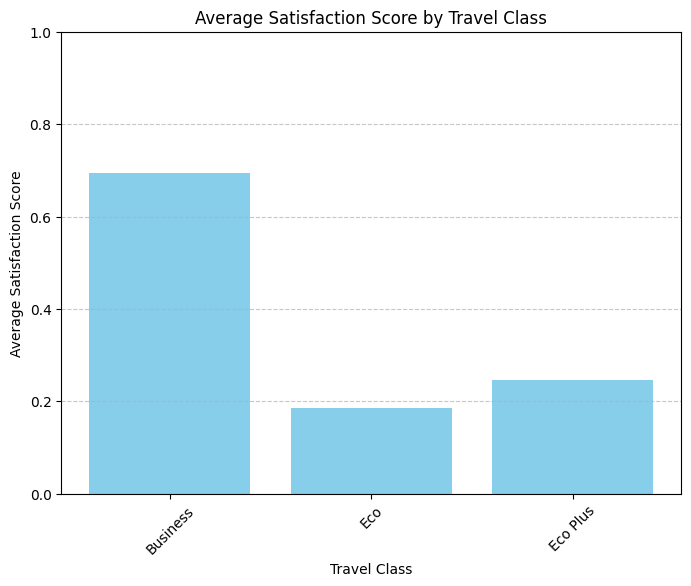

In [ ]:
# How does satisfaction vary across different travel classes (e.g., economy, premium economy, business, first class)?
# Visualization: Bar plot showing average satisfaction score for each travel class.

# Map satisfaction to numerical values
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}
airline['Satisfaction_Num'] = airline['satisfaction'].map(satisfaction_mapping)

# Group by Travel Class and calculate the average satisfaction score
avg_satisfaction_by_class = airline.groupby('Class')['Satisfaction_Num'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_satisfaction_by_class['Class'], avg_satisfaction_by_class['Satisfaction_Num'], color='skyblue')
plt.title('Average Satisfaction Score by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 to represent satisfaction score range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

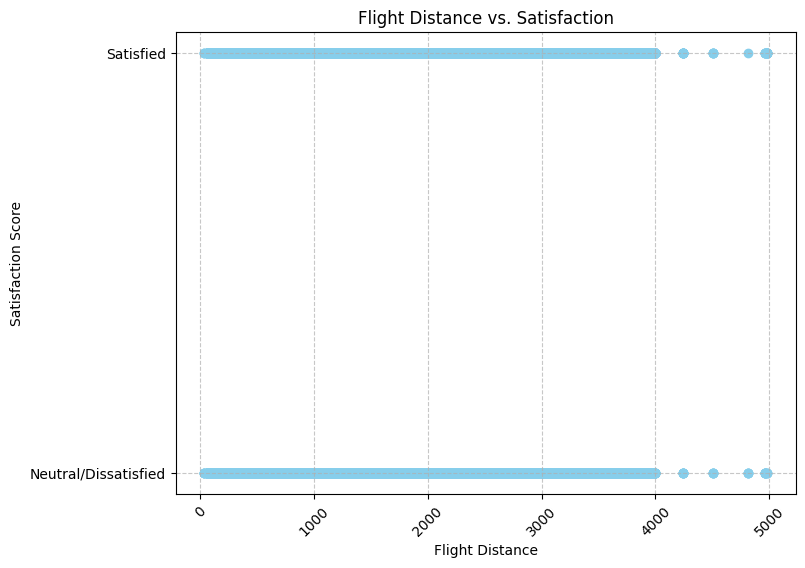

In [ ]:
# Is there a correlation between flight distance and satisfaction levels?
# Visualization: Scatter plot with flight distance on the x-axis and satisfaction score on the y-axis.

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(airline['Flight_Distance'], airline['Satisfaction_Num'], color='skyblue')
plt.title('Flight Distance vs. Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

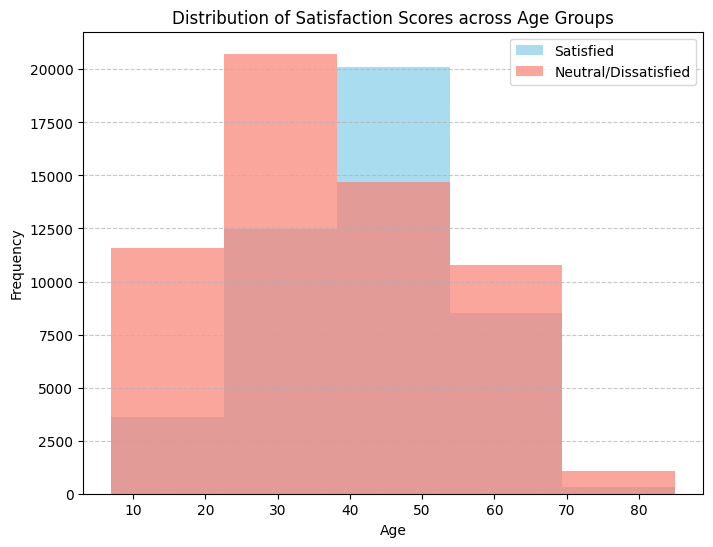

In [ ]:
# 5. What is the distribution of satisfaction scores across different age groups?
# Visualization: Histogram or box plot showing satisfaction scores for different age groups.

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(airline[airline['satisfaction'] == 'satisfied']['Age'], bins=5, color='skyblue', alpha=0.7, label='Satisfied')
plt.hist(airline[airline['satisfaction'] == 'neutral or dissatisfied']['Age'], bins=5, color='salmon', alpha=0.7, label='Neutral/Dissatisfied')
plt.title('Distribution of Satisfaction Scores across Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

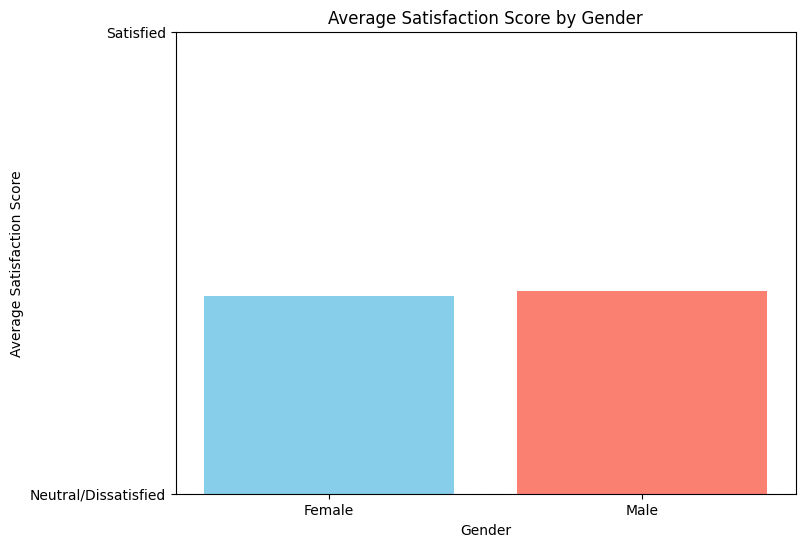

In [ ]:
# 6. Does satisfaction differ between male and female passengers?
# Visualization: Grouped bar plot comparing average satisfaction scores for male and female passengers.

# Group by Gender and calculate the average satisfaction score
avg_satisfaction_by_gender = airline.groupby('Gender')['Satisfaction_Num'].mean().reset_index()

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_satisfaction_by_gender['Gender'], avg_satisfaction_by_gender['Satisfaction_Num'], color=['skyblue', 'salmon'])
plt.title('Average Satisfaction Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Score')
plt.ylim(0, 1)  # Set y-axis limits to represent satisfaction score range
plt.xticks(rotation=0)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

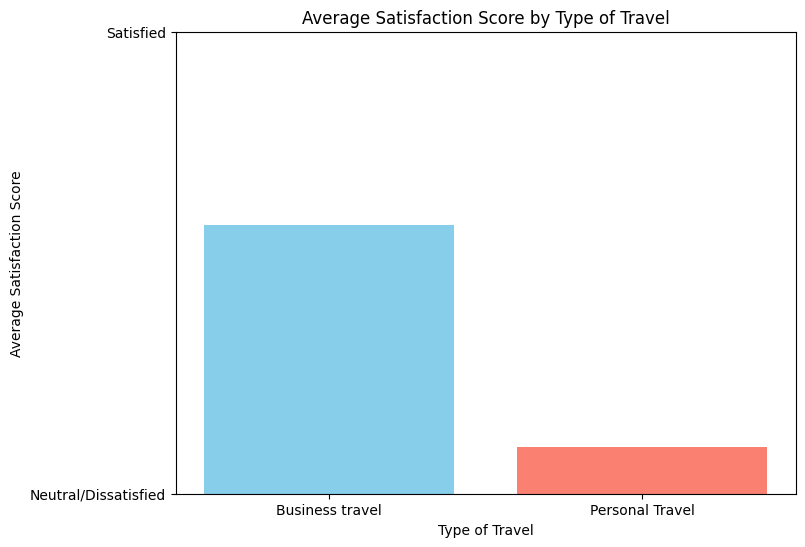

In [ ]:
# 7. How does satisfaction vary based on the type of travel (business vs. leisure)?
# Visualization: Grouped bar plot showing average satisfaction scores for business and leisure travelers.

# Group by Type_of_Travel and calculate the average satisfaction score
avg_satisfaction_by_travel_type = airline.groupby('Type_of_Travel')['Satisfaction_Num'].mean().reset_index()

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_satisfaction_by_travel_type['Type_of_Travel'], avg_satisfaction_by_travel_type['Satisfaction_Num'], color=['skyblue', 'salmon'])
plt.title('Average Satisfaction Score by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Average Satisfaction Score')
plt.ylim(0, 1)  # Set y-axis limits to represent satisfaction score range
plt.xticks(rotation=0)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

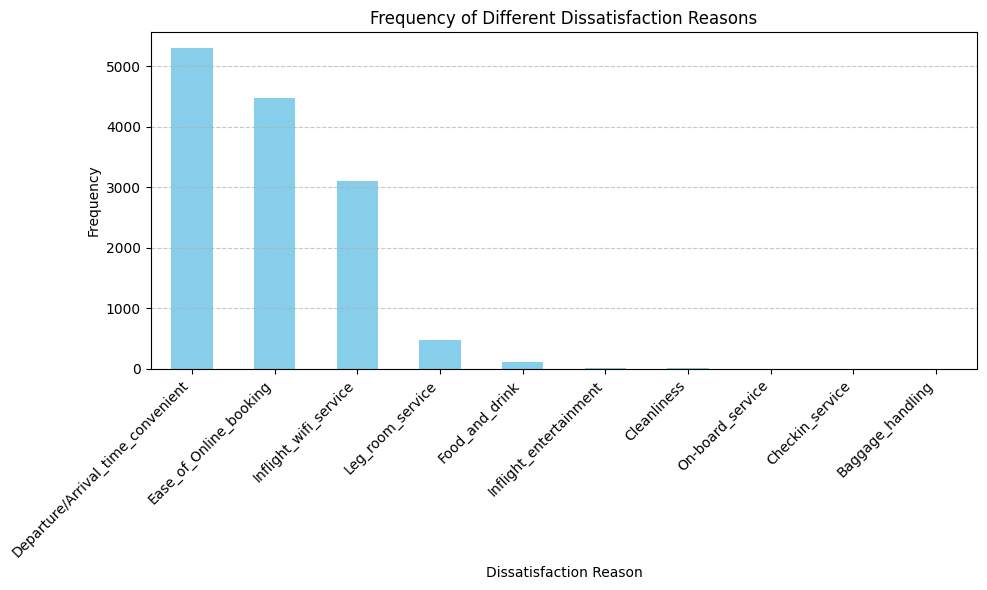

In [ ]:
# 8. What are the most common reasons for dissatisfaction among passengers?
# Visualization: Word cloud or bar plot showing the frequency of different dissatisfaction reasons.

# Select relevant columns for dissatisfaction reasons
dissatisfaction_columns = [
    'Inflight_wifi_service', 'Inflight_entertainment', 'Food_and_drink',
    'Ease_of_Online_booking', 'On-board_service',
    'Leg_room_service', 'Baggage_handling', 'Checkin_service',
    'Cleanliness', 'Departure/Arrival_time_convenient'
]

# Calculate the total dissatisfaction count for each reason
dissatisfaction_counts = airline[dissatisfaction_columns].apply(lambda x: x.value_counts().get(0, 0))

# Sort the dissatisfaction counts in descending order
dissatisfaction_counts = dissatisfaction_counts.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
dissatisfaction_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Different Dissatisfaction Reasons')
plt.xlabel('Dissatisfaction Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

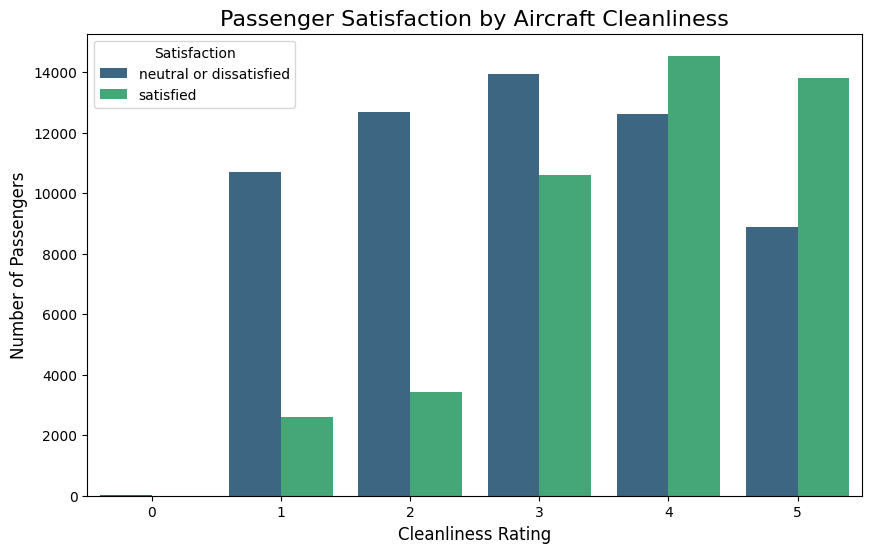

In [ ]:
# 9. Does the cleanliness of the aircraft affect passenger satisfaction?
# Visualization: Box plot comparing satisfaction scores for different cleanliness ratings.

# Plotting the box plot

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Cleanliness', hue='satisfaction', data=airline, palette='viridis')

# Set plot labels and title
ax.set_title('Passenger Satisfaction by Aircraft Cleanliness', fontsize=16)
ax.set_xlabel('Cleanliness Rating', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.legend(title='Satisfaction')

# Display the plot
plt.show()

<ipython-input-38-c09178e338e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type_of_Travel', y='Satisfaction_Num', data=airline, palette='Set2', inner='quartile')


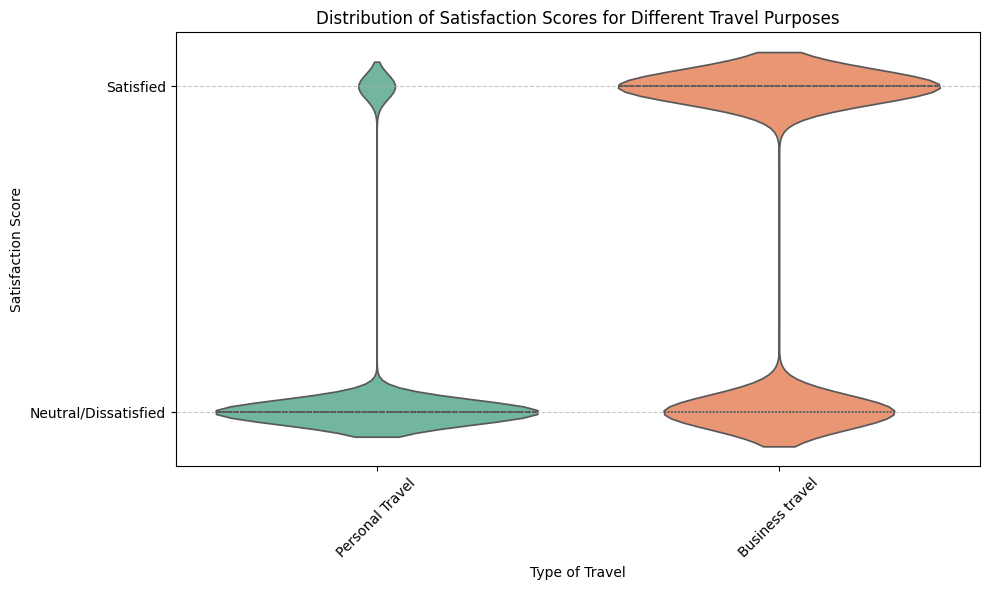

In [ ]:
# 10. What is the distribution of satisfaction scores for passengers with different travel purposes (e.g., vacation, business trip, family visit)?
# Visualization: Box plot or violin plot showing satisfaction scores for each travel purpose.

# Plotting the box plot or violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Type_of_Travel', y='Satisfaction_Num', data=airline, palette='Set2', inner='quartile')
plt.title('Distribution of Satisfaction Scores for Different Travel Purposes')
plt.xlabel('Type of Travel')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

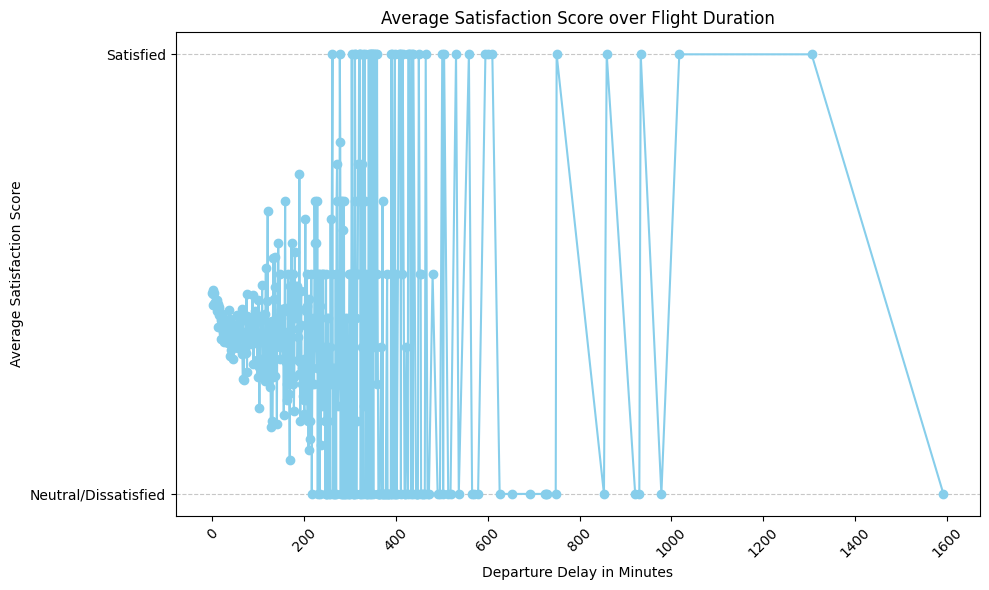

In [ ]:
# 11. How does the satisfaction level change with the duration of the flight?
# Visualization: Line plot showing average satisfaction scores over different flight durations.

# Group by Departure Delay in Minutes and calculate the average satisfaction score
avg_satisfaction_by_duration = airline.groupby('Departure_Delay_in_Minutes')['Satisfaction_Num'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(avg_satisfaction_by_duration, color='skyblue', marker='o', linestyle='-')
plt.title('Average Satisfaction Score over Flight Duration')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

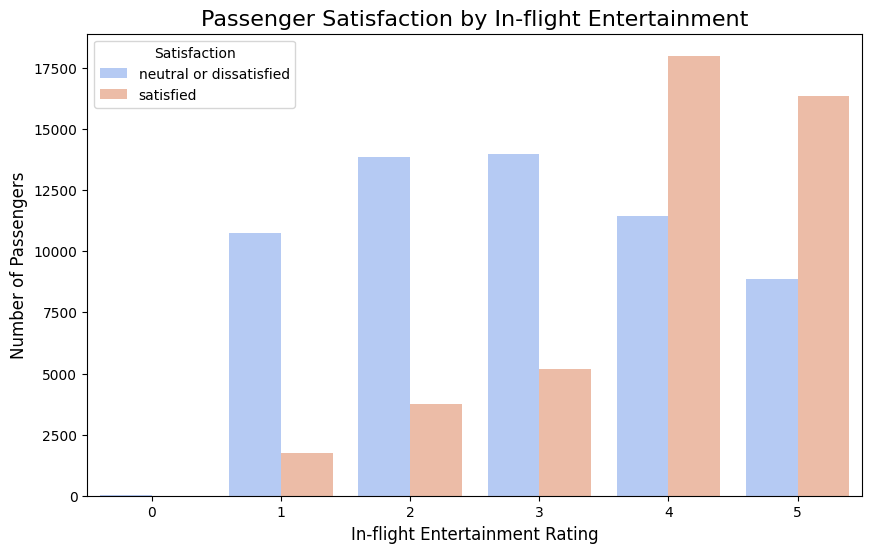

In [ ]:
# 12. Does the availability of in-flight entertainment impact satisfaction levels?
# Visualization: Box plot comparing satisfaction scores for flights with and without in-flight entertainment.

# Plotting the box plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Inflight_entertainment', hue='satisfaction', data=airline, palette='coolwarm')

# Set plot labels and title
ax.set_title('Passenger Satisfaction by In-flight Entertainment', fontsize=16)
ax.set_xlabel('In-flight Entertainment Rating', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.legend(title='Satisfaction')

# Display the plot
plt.show()


<ipython-input-41-d7860124a8e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Flight_Distance', y='satisfaction', data=airline, palette='Set3')


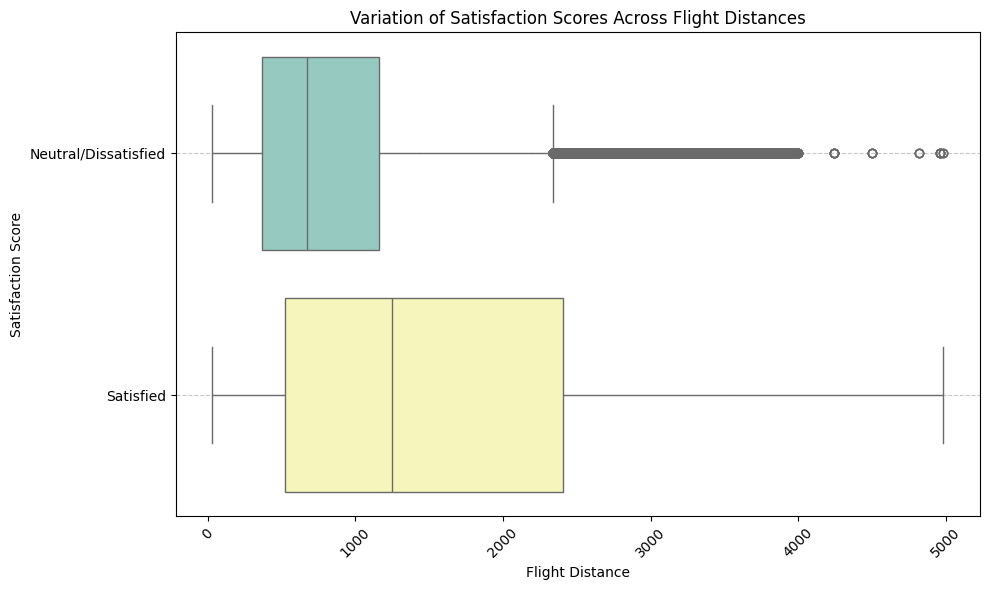

In [ ]:
# 13. How does satisfaction vary across flight distance?
# Visualization: line plot or box plot showing average satisfaction scores for flight distance.

# Plotting the line plot or box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Flight_Distance', y='satisfaction', data=airline, palette='Set3')
plt.title('Variation of Satisfaction Scores Across Flight Distances')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

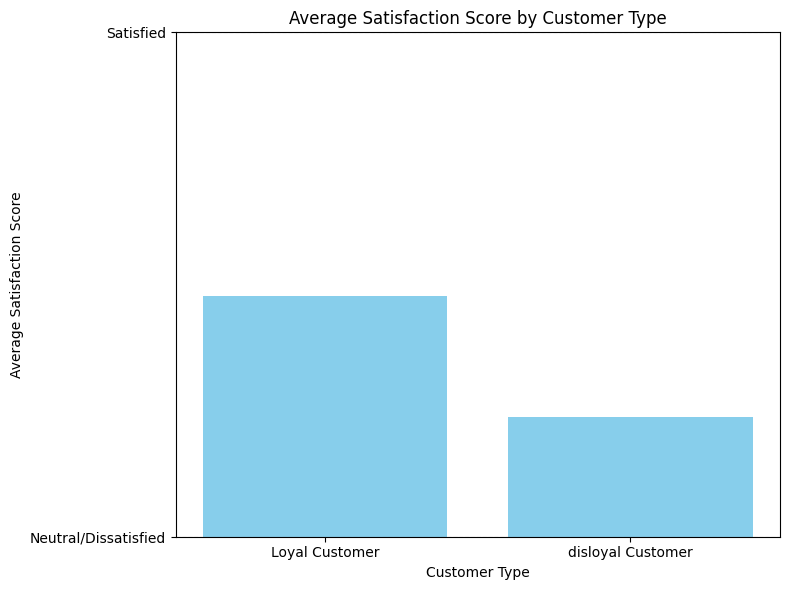

In [ ]:
# 14. What is the relationship between satisfaction and the type of customer flying?
# Visualization: Bar plot or line plot showing average satisfaction scores for different customer categories (e.g., loyal).

# Group by Customer Type and calculate the average satisfaction score
avg_satisfaction_by_customer_type = airline.groupby('Customer_Type')['Satisfaction_Num'].mean().reset_index()

# Plotting the bar plot or line plot
plt.figure(figsize=(8, 6))
plt.bar(avg_satisfaction_by_customer_type['Customer_Type'], avg_satisfaction_by_customer_type['Satisfaction_Num'], color='skyblue')
plt.title('Average Satisfaction Score by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Satisfaction Score')
plt.ylim(0, 1)  # Set y-axis limits to represent satisfaction score range
plt.xticks(rotation=0)
plt.yticks([0, 1], ['Neutral/Dissatisfied', 'Satisfied'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 5. DATA PREPROCESSING

# 1. Remove SR and id columns
airline = airline.drop(['SR', 'id'], axis=1)

In [ ]:
# 2. Converting categorical to numerical using label encoding and one hot encoding

# Perform label encoding for Gender and Customer Type
label_mapping = {'Female': 0, 'Male': 1, 'Loyal Customer': 0, 'disloyal Customer': 1}
airline['Gender_Encoded'] = airline['Gender'].map(label_mapping)
airline['Customer_Type_Encoded'] = airline['Customer_Type'].map(label_mapping)

# Perform one-hot encoding for Type of Travel and Class
airline_encoded = pd.get_dummies(airline, columns=['Type_of_Travel', 'Class'], drop_first=True)

airline_encoded = airline_encoded.drop(['Gender', 'Customer_Type', 'satisfaction'], axis=1)

airline_encoded.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction_Num,Gender_Encoded,Customer_Type_Encoded,Type_of_Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,0,1,0,True,False,True
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,0,1,1,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,1,0,0,False,False,False
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,0,False,False,False


In [ ]:
# 3. Standardization

from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

# Standardize numerical columns
scaler = StandardScaler()
airline_encoded[numerical_cols] = scaler.fit_transform(airline_encoded[numerical_cols])
airline_encoded = airline_encoded.dropna()

airline_encoded.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Satisfaction_Num,Gender_Encoded,Customer_Type_Encoded,Type_of_Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,3,4,3,1,5,3,5,5,...,5,5,0.266393,0.072905,0,1,0,True,False,True
1,-0.951360,-0.957184,3,2,3,3,1,3,1,1,...,4,1,-0.361375,-0.237184,0,1,1,False,False,False
2,-0.885200,-0.047584,2,2,2,2,5,5,5,5,...,4,5,-0.387532,-0.392229,1,0,0,False,False,False
3,-0.951360,-0.629246,2,5,5,5,2,2,2,2,...,4,2,-0.099805,-0.159662,0,0,0,False,False,False
4,1.430397,-0.978244,3,3,3,3,4,5,5,3,...,3,3,-0.387532,-0.392229,1,1,0,False,False,False


In [ ]:
# 4. Train test split

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = airline_encoded.drop(columns=['Satisfaction_Num'])
y = airline_encoded['Satisfaction_Num']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (82875, 23)
y_train shape: (82875,)
X_test shape: (20719, 23)
y_test shape: (20719,)


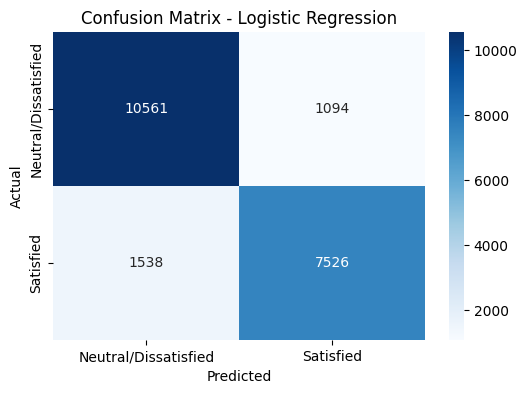

Logistic Regression Accuracy: 0.8730



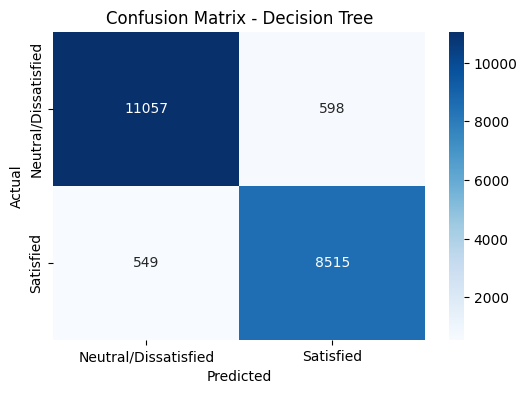

Decision Tree Accuracy: 0.9446



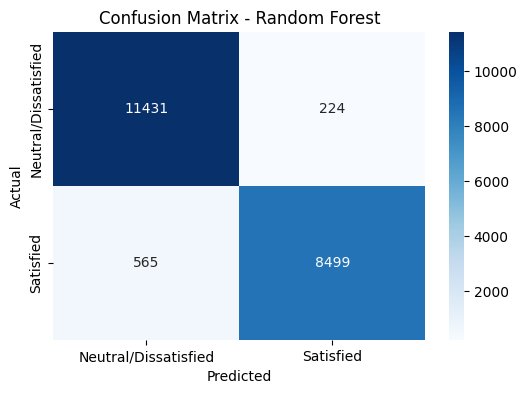

Random Forest Accuracy: 0.9619



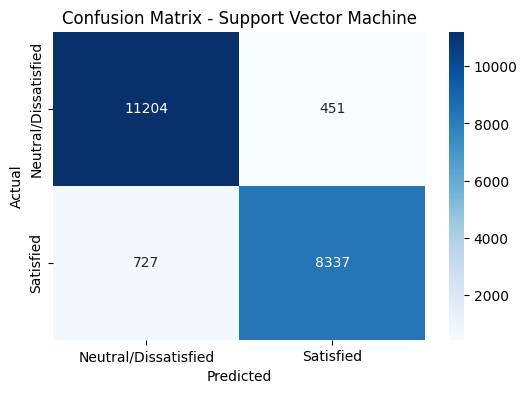

Support Vector Machine Accuracy: 0.9431



In [ ]:
# 5. Model development

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}\n")

In [ ]:
# 5. Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest model with best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Dissatisfied', 'Satisfied'], yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
